
# Presidential Speech comparison
## Assignment 1 - COSC 545 Fall 2022
## Dan Scott - dscott57 

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 


### This analysis compares presidential speeches from two presidents: Presidents Roosevelt and Obama. <br><br>Using text analysis techniques, the analysis will compare the term frequencies between various speeches of the president and between presidents. 

1. a) The word frequency (TF) between President Roosevelt's 1st and 2nd speech overlap with 11 words common to both the top 20 TFs for each speech. Further, common to all four of the Roosevelt speeches, five words were in the top 20 terms of each of the speechs:  upon, law, would, government, great. The term 'government' having the higest combined TF of 196.  
 b) The TF between President Obama's 1st and 2nd speech have 8 words in common among the top 20 highest TFs. Also, common to all President Obama's four speeches are the same 8 words (american, years, new, work, jobs, america, year, people) with 'jobs' total TF of 113.

2. Comparing President Roosevelt's speeches with President Obama's, only three words are common between the top 20 TFs: one, work & people.  These words vary in rank compared to TF or use by each President. Further, President Roosevelt speeches had neary twice as many words (after removing stop words) with 30,429 tokens, compared to President Obama's total token count of 14,481.

3. Looking at the word 'job', which was President Obama's most used word (TF=113), President Roosevelt never used the word job in any of his four speeches. Also, the second highest word measued by TF/IDF was the word 'isthmus'.  President Obama never used this word, and President Roosevelt used this word 42 times in one speech coinciding with the year in which Panama Canal route had been decided by treaty with Colombia.




### Gathering the data

In each of the webpages, there exists an html 'DIV' tag which houses the text of the speech.  Using BeautifulSoup, we can extract the specific text by the html class attribute tag like this:
<code >
    soup.findAll('div', attrs={'class':'view-transcript'})
    # Or alternatly, just the first occurance of a div with that class
    soup.find('div', attrs={'class':'view-transcript'})
</code>
<br>


#### Using the millercenter website, we scape 8 specific speeches from two Presidential authors

In [1]:
baseURL = 'https://millercenter.org/the-presidency/presidential-speeches/'

#Speech_ID , HTML DIV class containing speech, page <URL of speech>
speech_urls = \
[('Roosevelt_1', 'view-transcript', 'december-3-1901-first-annual-message'),
 ('Roosevelt_2', 'view-transcript', 'december-2-1902-second-annual-message'),
 ('Roosevelt_3', 'view-transcript', 'december-7-1903-third-annual-message'),
 ('Roosevelt_4', 'view-transcript', 'december-6-1904-fourth-annual-message'),
 ('Obama_1', 'transcript-inner', 'january-27-2010-2010-state-union-address'),
 ('Obama_2', 'transcript-inner', 'january-25-2011-2011-state-union-address'),
 ('Obama_3', 'transcript-inner', 'january-24-2012-2012-state-union-address'),
 ('Obama_4', 'transcript-inner', 'february-13-2013-2013-state-union-address')
 ]



In [2]:
# Function: get_transcript()
# Extract the text of the HTML by finding a specific HTML tag
# Requres html formatted text and an html class tag

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}

def get_transcript(html, tag):
    if not len(tag) and not len(html):
        raise RuntimeError('the html tag cannot be empty')
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    result = soup.find('div', attrs={'class': tag})
    return result.get_text()

import requests

# All the speeches are stored in 'text' format,
# by passing the URL to BeautifulSoup, and removing the HTML markup,
# the raw text is returned and stored in a list
raw_transcripts = []

for pres, htmlTag, speechUrl in speech_urls:
    r = requests.get(baseURL + speechUrl,headers=headers)
    raw_transcripts.append(get_transcript(r.text, htmlTag))

    

### Cleaning The Data
While most of the text has been washed of HTML tags, there are still non-language characters and such that need to be cleaned. We also convert the speech to lower case and remove the word 'Transcript' which comes from the HTML page's title.

Later, during the exploring, the stop words are also removed

In [3]:
# For example, looking at the first 100 characters of the 
# last speech, there are control characters (\r\n) as well as 
# unrecognizable characters (\xa0)
raw_transcripts[4][0:100]

'\nTranscript\nMadam Speaker, Vice President Biden, Members of Congress, distinguished guests, and fell'

In [4]:
import re
import pandas as pd

def raw_to_df(index, text, url, pres):
    text = re.sub(r'\W',' ', text)    #remove all non-AlphaNumeric characters
    text = re.sub(r'Transcript','',text) #remove the word 'Transcript' which is from the header
    data = {'president':pres, 'url':url, 'speech':text}
    return data

frames = []
for i in range(len(raw_transcripts)):
    frames.append( ( raw_to_df(i, raw_transcripts[i], speech_urls[i][2], speech_urls[i][0])) )

          

In [5]:
df1 = pd.DataFrame.from_dict(frames, orient='columns',)
df1.reset_index(inplace=True, drop=True)
df1.head(10)


,president,url,speech
0,Roosevelt_1,december-3-1901-first-annual-message,To the Senate and House of Representatives Th...
1,Roosevelt_2,december-2-1902-second-annual-message,To the Senate and House of Representatives We...
2,Roosevelt_3,december-7-1903-third-annual-message,To the Senate and House of Representatives Th...
3,Roosevelt_4,december-6-1904-fourth-annual-message,To the Senate and House of Representatives Th...
4,Obama_1,january-27-2010-2010-state-union-address,Madam Speaker Vice President Biden Members...
5,Obama_2,january-25-2011-2011-state-union-address,Mr Speaker Mr Vice President members of ...
6,Obama_3,january-24-2012-2012-state-union-address,Mr Speaker Mr Vice President members of...
7,Obama_4,february-13-2013-2013-state-union-address,Mr Speaker Mr Vice President members o...


### Explore Data and add some features
Here we attempt to draw simple data analytics from each speech.  
-- The analysis converts all text to lower,  removes stop words, change 
-- put's it all in a pandas.DataFrame to keep it organized.

In [6]:
# The speeches are in the speech column, 
# just looking around here at some of the data to get a feel 
# for what's there.  added the elipisis to remind me there's more
df1.speech[4][0:1000]+' ...'

'  Madam Speaker  Vice President Biden  Members of Congress  distinguished guests  and fellow Americans  Our Constitution declares that from time to time  the President shall give to Congress information about the state of our Union  For 220 years  our leaders have fulfilled this duty  They ve done so during periods of prosperity and tranquility  and they ve done so in the midst of war and depression  at moments of great strife and great struggle  It s tempting to look back on these moments and assume that our progress was inevitable  that America was always destined to succeed  But when the Union was turned back at Bull Run and the Allies first landed at Omaha Beach  victory was very much in doubt  When the market crashed on Black Tuesday and civil rights marchers were beaten on Bloody Sunday  the future was anything but certain  These were the times that tested the courage of our convictions and the strength of our Union  And despite all our divisions and disagreements  our hesitatio

#### Continuing to clean up the speech's text, we make all words lower case, 'Tokenize' the speech into a list of words, and remove the stop words.

NOTE: After the first analysis, It became apparent that the word 'Applause' was added to later transcripts.  As that was not part of the speech, I added it to the stop words.

In [7]:
# import nltk
# nltk.download('punkt')

In [8]:
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
import nltk
stop_words = nltk.corpus.stopwords.words('english')+['applause']

def remove_stop_words(tokenized_text):
    filtered_sent=[]
    for w in tokenized_text:
        if w not in stop_words:
            filtered_sent.append(w)
    return filtered_sent


df1['tokenized_words'] = df1.speech.apply(str.lower)
df1['tokenized_words'] = df1.tokenized_words.apply(word_tokenize)
df1['tokenized_words'] = df1.tokenized_words.apply(remove_stop_words)
df1['number_of_words'] = df1.tokenized_words.apply(len)  #this is the number of words AFTER removing stop words

df1.head(7)

,president,url,speech,tokenized_words,number_of_words
0,Roosevelt_1,december-3-1901-first-annual-message,To the Senate and House of Representatives Th...,"[senate, house, representatives, congress, ass...",9535
1,Roosevelt_2,december-2-1902-second-annual-message,To the Senate and House of Representatives We...,"[senate, house, representatives, still, contin...",4709
2,Roosevelt_3,december-7-1903-third-annual-message,To the Senate and House of Representatives Th...,"[senate, house, representatives, country, cong...",7603
3,Roosevelt_4,december-6-1904-fourth-annual-message,To the Senate and House of Representatives Th...,"[senate, house, representatives, nation, conti...",8582
4,Obama_1,january-27-2010-2010-state-union-address,Madam Speaker Vice President Biden Members...,"[madam, speaker, vice, president, biden, membe...",3678
5,Obama_2,january-25-2011-2011-state-union-address,Mr Speaker Mr Vice President members of ...,"[mr, speaker, mr, vice, president, members, co...",3485
6,Obama_3,january-24-2012-2012-state-union-address,Mr Speaker Mr Vice President members of...,"[mr, speaker, mr, vice, president, members, co...",3667


In [9]:
df1[0:4]['number_of_words'].sum()

30429

In [10]:
df1[4:]['number_of_words'].sum()

14481

In [11]:
from collections import Counter
import operator

#This is basicaly the word frequency counter from Dr. Mockus
def calcWordFrequency(text):
    wf = Counter(text)   
    # Get an ordered list
    wfs = sorted(wf.items(), key = operator.itemgetter(1), reverse=True)
    # only use the top twenty words
    ml = min(len(wfs),20)
    return (wfs[0:ml][::-1])

#Just checking it works and what the output shall be
calcWordFrequency(df1.tokenized_words[6])
    

[('time', 16),
 ('work', 17),
 ('let', 18),
 ('country', 18),
 ('years', 18),
 ('like', 19),
 ('year', 20),
 ('world', 20),
 ('americans', 20),
 ('tax', 23),
 ('every', 23),
 ('energy', 23),
 ('people', 23),
 ('one', 24),
 ('get', 25),
 ('right', 27),
 ('new', 27),
 ('america', 33),
 ('jobs', 34),
 ('american', 35)]

In [12]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title, xlabel1, xlabel2):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab.yticks (pos, [ x [0] for x in wf_ee ])
    ax1.barh (range(len(wf_ee)), [x[1] for x in wf_ee ], align='center')
    ax1.set(xlabel=xlabel1)
    
    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')
    ax2.set(xlabel=xlabel2)

 

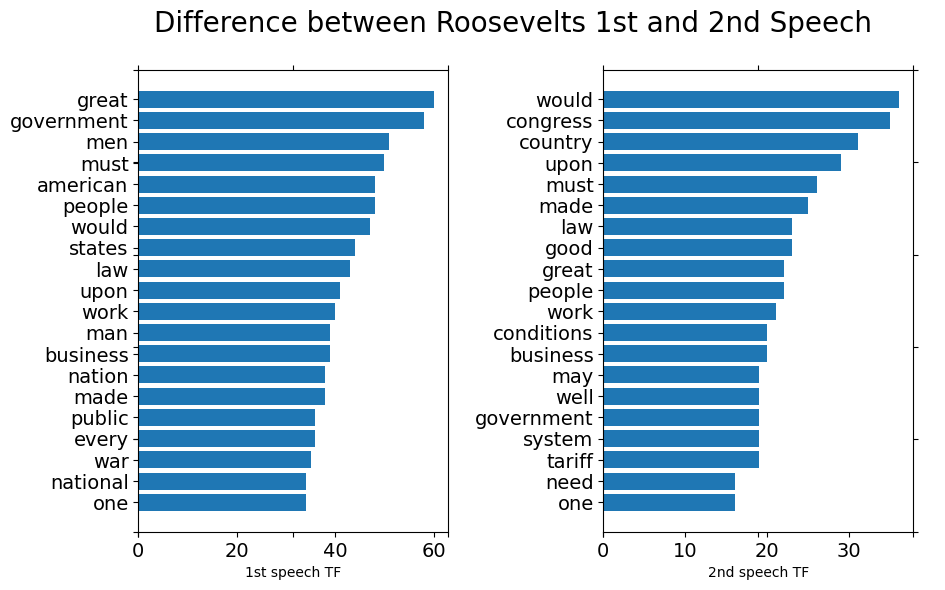

In [13]:
wf_Roosevelt1 = calcWordFrequency(df1.tokenized_words[0])    
wf_Roosevelt2 = calcWordFrequency(df1.tokenized_words[1])    
    
plotTwoLists(wf_Roosevelt1, wf_Roosevelt2, 'Difference between Roosevelts 1st and 2nd Speech', '1st speech TF', '2nd speech TF')

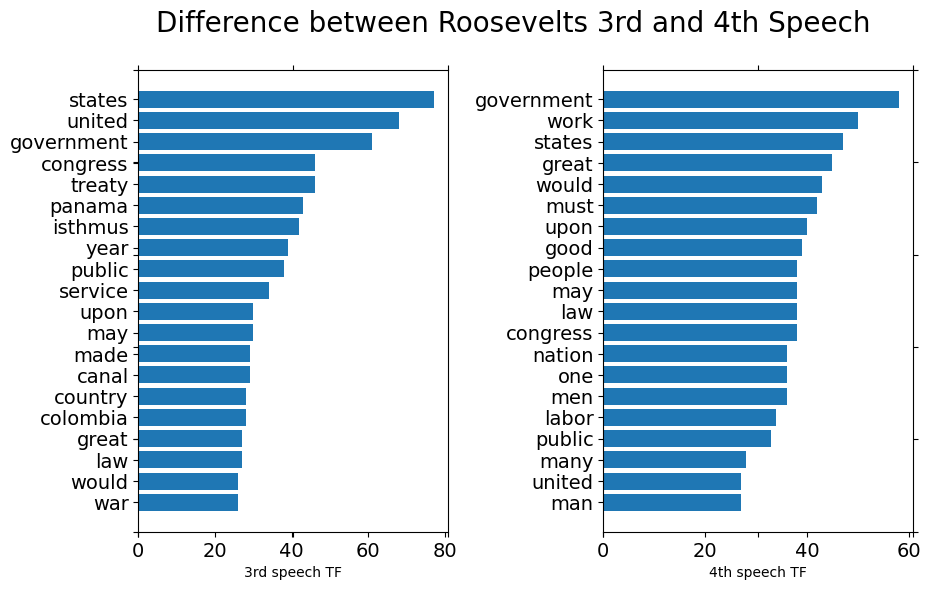

In [14]:
wf_Roosevelt3 = calcWordFrequency(df1.tokenized_words[2])    
wf_Roosevelt4 = calcWordFrequency(df1.tokenized_words[3])    
    
plotTwoLists(wf_Roosevelt3, wf_Roosevelt4, 'Difference between Roosevelts 3rd and 4th Speech', '3rd speech TF', '4th speech TF')

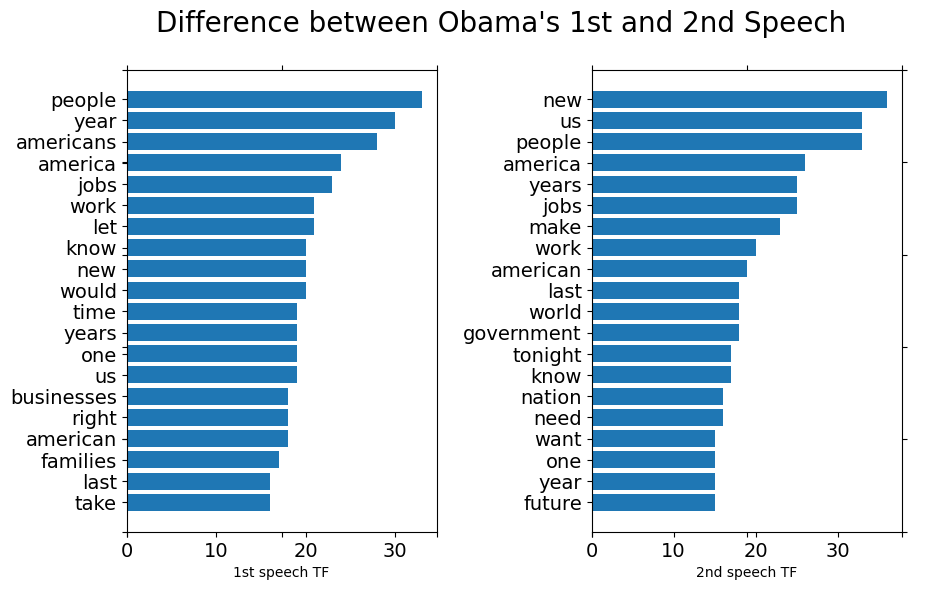

In [15]:
wf_Obama1 = calcWordFrequency(df1.tokenized_words[4])    
wf_Obama2 = calcWordFrequency(df1.tokenized_words[5])    
    
plotTwoLists(wf_Obama1, wf_Obama2, 'Difference between Obama\'s 1st and 2nd Speech','1st speech TF', '2nd speech TF')

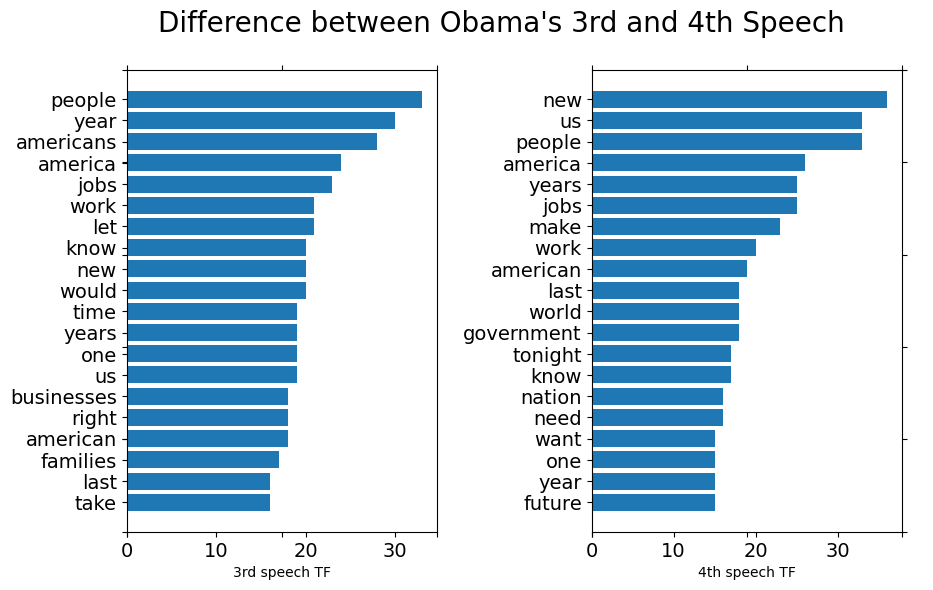

In [16]:
wf_Obama3 = calcWordFrequency(df1.tokenized_words[6])    
wf_Obama4 = calcWordFrequency(df1.tokenized_words[7])    
    
plotTwoLists(wf_Obama1, wf_Obama2, 'Difference between Obama\'s 3rd and 4th Speech', '3rd speech TF', '4th speech TF')

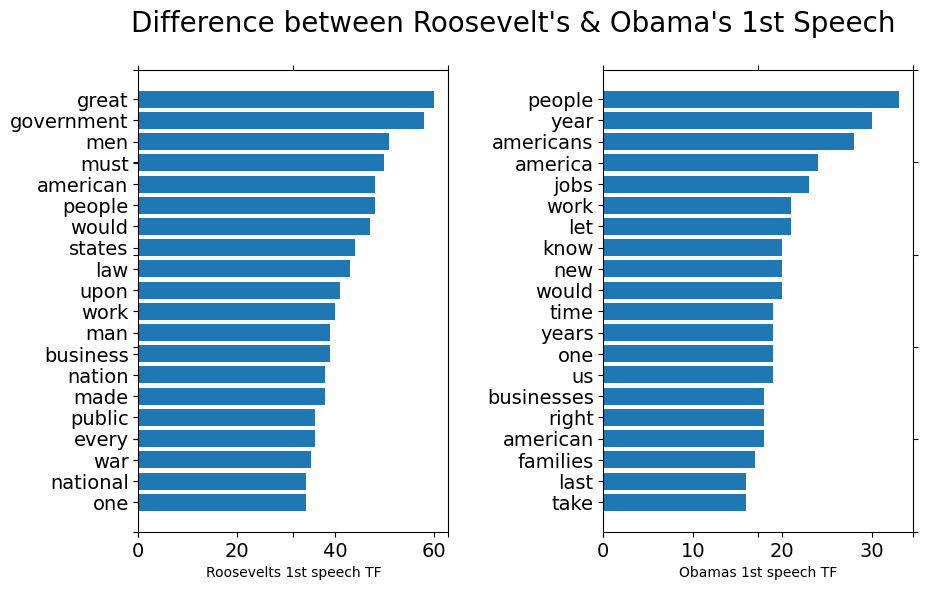

In [17]:
plotTwoLists(wf_Roosevelt1, wf_Obama1, 'Difference between Roosevelt\'s & Obama\'s 1st Speech', 'Roosevelts 1st speech TF', 'Obamas 1st speech TF')

### Comparing TF between Roosevelt & Obama

The following barchart depicts the top 20 Term Frequencies (TFs) of the first four annual speeches combined.  All the terms from Roosevelt's speeches were calcualted as one corpus, as were Obama's speeches. There are some TFs that rank high in both sets { people, work, one} and there are many TFs that do not occur in the opposite set {In R not in O='government'; In O not in R='america'}


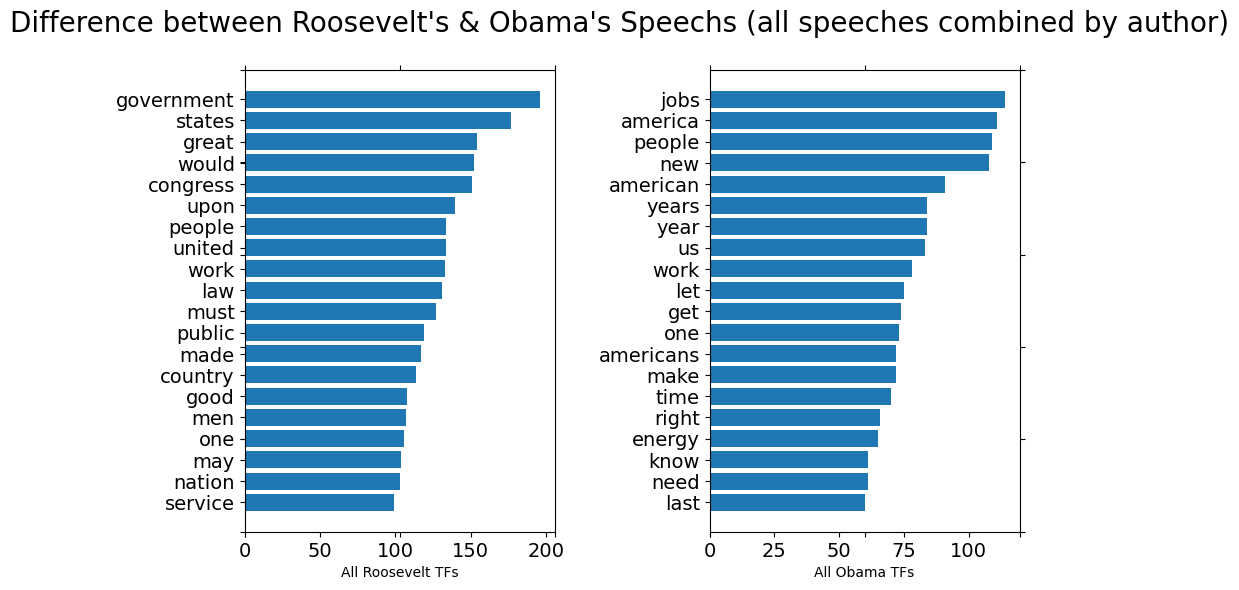

In [18]:
wf_All_Roosevelt = calcWordFrequency(df1.tokenized_words[0]+df1.tokenized_words[1]+df1.tokenized_words[2]+df1.tokenized_words[3])    
wf_All_Obama = calcWordFrequency(df1.tokenized_words[4]+df1.tokenized_words[5]+df1.tokenized_words[6]+df1.tokenized_words[7])    

plotTwoLists(wf_All_Roosevelt, wf_All_Obama, 'Difference between Roosevelt\'s & Obama\'s Speechs (all speeches combined by author)', 'All Roosevelt TFs', 'All Obama TFs')


#### These are the top 20 TFs in common between all Roosevelt's and Obama's speeches.

In [19]:
#These are the top 20 TFs in common between Roosevelt's and Obama's speeches.
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

intersection([num[0] for num in wf_All_Roosevelt], [num[0] for num in wf_All_Obama])


['one', 'work', 'people']

In [20]:
#These are the top TF terms that are common all Roosevelt speeches
common = intersection([num[0] for num in wf_Roosevelt1], [num[0] for num in wf_Roosevelt2])
common2 =intersection(common, [num[0] for num in wf_Roosevelt3])
common3 =intersection(common2, [num[0] for num in wf_Roosevelt4])
common3

['upon', 'law', 'would', 'government', 'great']

In [21]:
set([num[0] for num in wf_Roosevelt1]) & set([num[0] for num in wf_Roosevelt2]) & set([num[0] for num in wf_Roosevelt3])  & set([num[0] for num in wf_Roosevelt4])

{'government', 'great', 'law', 'upon', 'would'}

In [22]:
#Words not common in the top 20 of the first two speeches.
print(set([num[0] for num in wf_Roosevelt1]).difference(set([num[0] for num in wf_Roosevelt2])))

{'war', 'nation', 'public', 'american', 'every', 'states', 'man', 'national', 'men'}


#### These are the top 20 TFs from Obama's speeches that are not in the top 20 TFs in Roosevelts speeches

In [23]:
#These are the top 20 TFs from Obama's speeches that are not in the top 20 TFs in Roosevelts speeches
print(set([num[0] for num in wf_All_Obama]).difference(set([num[0] for num in wf_All_Roosevelt])))

{'know', 'energy', 'time', 'last', 'years', 'get', 'new', 'year', 'american', 'let', 'make', 'right', 'america', 'jobs', 'need', 'us', 'americans'}


In [24]:
#These are the top 20 TFs common to Obama's speeches 1st and 2nd speech
print(set([num[0] for num in wf_Obama1]).difference(set([num[0] for num in wf_Obama2])))

{'would', 'time', 'families', 'let', 'right', 'businesses', 'americans', 'take'}


In [25]:
common = intersection([num[0] for num in wf_Obama1], [num[0] for num in wf_Obama2])
common2 =intersection(common, [num[0] for num in wf_Obama3])
common3 =intersection(common2, [num[0] for num in wf_Obama4])
common3

['american', 'years', 'new', 'work', 'jobs', 'america', 'year', 'people']

In [26]:
set([num[0] for num in wf_Obama1]) & set([num[0] for num in wf_Obama2]) & set([num[0] for num in wf_Obama3])  & set([num[0] for num in wf_Obama4])

{'america', 'american', 'jobs', 'new', 'people', 'work', 'year', 'years'}

In [27]:
wf_All_Obama

[('last', 60),
 ('need', 61),
 ('know', 61),
 ('energy', 65),
 ('right', 66),
 ('time', 70),
 ('make', 72),
 ('americans', 72),
 ('one', 73),
 ('get', 74),
 ('let', 75),
 ('work', 78),
 ('us', 83),
 ('year', 84),
 ('years', 84),
 ('american', 91),
 ('new', 108),
 ('people', 109),
 ('america', 111),
 ('jobs', 114)]

#### These are the top 20 TFs from Roosevelt's speeches that are not in the top 20 TFs in Obama's speeches

In [28]:
#These are the top 20 TFs from Roosevelt's speeches that are not in the top 20 TFs in Obama's speeches
print(set([num[0] for num in wf_All_Roosevelt]).difference(set([num[0] for num in wf_All_Obama])))

{'men', 'government', 'nation', 'united', 'would', 'made', 'public', 'country', 'law', 'may', 'congress', 'must', 'upon', 'service', 'states', 'great', 'good'}


In [29]:
wf_All_Roosevelt

[('service', 99),
 ('nation', 103),
 ('may', 104),
 ('one', 106),
 ('men', 107),
 ('good', 108),
 ('country', 114),
 ('made', 117),
 ('public', 119),
 ('must', 127),
 ('law', 131),
 ('work', 133),
 ('united', 134),
 ('people', 134),
 ('upon', 140),
 ('congress', 151),
 ('would', 152),
 ('great', 154),
 ('states', 177),
 ('government', 196)]

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate CountVectorizer() 
cv=CountVectorizer(stop_words = stop_words, min_df = 1) 

# this step generates word counts for all the words in all the speeches
word_count_vector=cv.fit_transform(df1.speech)


In [31]:
#These are all the words that are counted in the CountVectorizer for all speeches (every word in every speech)
X = word_count_vector.toarray()

#THis matrix combined with the cv.feature names above, tells us how many words are in each document
# for example, the '00' and '000' words occur 1 and 5 times respectively in the last document. 
bagofwords=pd.DataFrame(X, columns = cv.get_feature_names_out())
bagofwords.head(10)


,00,000,007,009,024,040,047,067,099,10,...,younger,youngest,youngstown,youth,youthful,yukon,zeal,zealous,zone,zoological
0,0,2,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,2,0,0,1
1,0,0,0,0,0,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,5,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0
3,0,2,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,2,0
4,0,3,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5,0,8,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
6,0,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7,1,5,0,0,0,0,0,0,0,3,...,0,1,1,0,0,0,0,0,0,0


#### Word cloud from all Roosevelt and Obama speeches combined (higher TF is bigger word font)

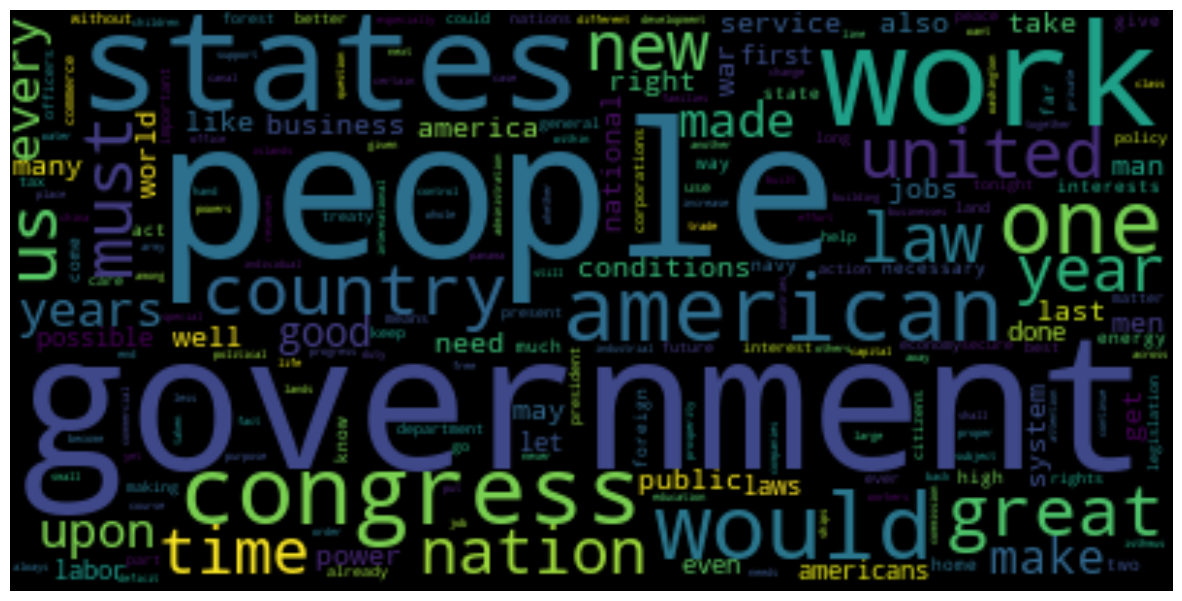

In [32]:
docs = X[(X>=0).any(axis=1)]
words = np.array(cv.get_feature_names_out())

doc = docs[:].sum(axis=0)
idx = (docs[:].sum(axis=0)>3)  #only get the words that occur more than 3 times
doc_words = words[idx]
doc_counts = doc[doc>3]


frequencies = dict(zip(doc_words, doc_counts))
frequencies

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black').fit_words(frequencies)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

#### Word Cloud of all Roosevelt Speeches

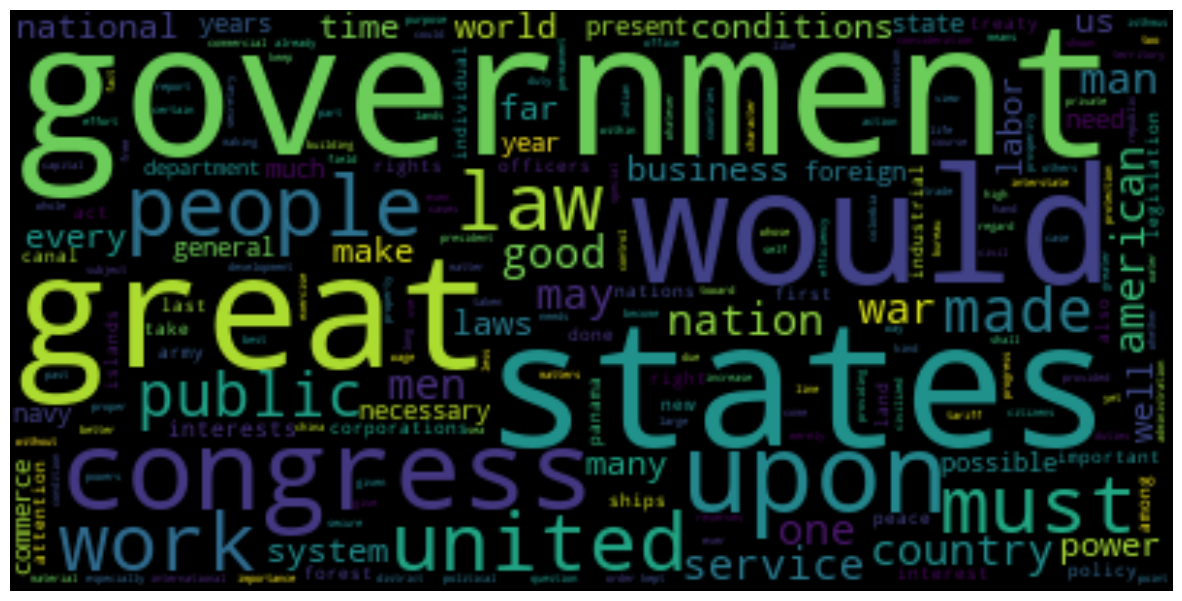

In [ ]:
docs = X[(X>0).any(axis=1)]
words = np.array(cv.get_feature_names_out())

doc = docs[0:4].sum(axis=0)
idx = (docs[0:4].sum(axis=0)>3)  #only get the words that occur more than 3 times
doc_words = words[idx]
doc_counts = doc[doc>3]


frequencies = dict(zip(doc_words, doc_counts))
frequencies

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black').fit_words(frequencies)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

#### Word Cloud of all Obama Speeches

In [ ]:
docs = X[(X>0).any(axis=1)]
words = np.array(cv.get_feature_names_out())

doc = docs[4:].sum(axis=0)
idx = (docs[4:].sum(axis=0)>3)  #only get the words that occur more than 3 times
doc_words = words[idx]
doc_counts = doc[doc>3]


frequencies = dict(zip(doc_words, doc_counts))
frequencies

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black').fit_words(frequencies)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

### Comparing TF-IDF of all speeches combined

In [ ]:
# settings that you use for count vectorizer go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words=stop_words)

# use all documents 
fitted_vectorizer=tfidf_vectorizer.fit(df1.speech)
tfidf_vectorizer_vectors=fitted_vectorizer.transform(df1.speech)


In [ ]:
#These are all the words that are counted in the TfidfVectorizer for all speeches (every word in every speech)
Z = tfidf_vectorizer_vectors.toarray()

#THis matrix combined with the cv.feature names above, tells us how many words are in each document
# for example, the '00' and '000' words occur 1 and 5 times respectively in the last document. 
bagofwordsTFIDF=pd.DataFrame(Z, columns = fitted_vectorizer.get_feature_names_out())
bagofwordsTFIDF.head(10)

##### Word Cloud of the highest TF-IDF from all speeches

In [ ]:
docs = Z[(Z>0).any(axis=1)]
words = np.array(fitted_vectorizer.get_feature_names_out())

doc = docs[:].max(axis=0)
idx = (docs[:].max(axis=0)>0)  
doc_words = words[idx]
doc_counts = doc[doc>0]

frequencies = dict(zip(doc_words, doc_counts))
frequencies

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black').fit_words(frequencies)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

In [ ]:
print(max(frequencies.values()))
print(max(frequencies, key=frequencies.get))
print(frequencies.get('isthmus'))

In [ ]:
bagofwords[['jobs','isthmus']]

### Comparing TF-IDF within Roosevelt's speeches

In [ ]:
docs = Z[(Z>0).any(axis=1)]
words = np.array(fitted_vectorizer.get_feature_names_out())

doc = docs[0:4].max(axis=0)
idx = (docs[0:4].max(axis=0)>0)  #only get the words that have the higest(max) TFIDF
doc_words = words[idx]
doc_counts = doc[doc>0]


frequencies = dict(zip(doc_words, doc_counts))
frequencies

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black').fit_words(frequencies)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

### Comparing TFIDF between Obama's speeches

In [ ]:
docs = Z[(Z>0).any(axis=1)]
words = np.array(fitted_vectorizer.get_feature_names_out())

doc = docs[4:].max(axis=0)
idx = (docs[4:].max(axis=0)>0)  #only get the words that have the higest(max) TFIDF
doc_words = words[idx]
doc_counts = doc[doc>0]


frequencies = dict(zip(doc_words, doc_counts))
frequencies

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black').fit_words(frequencies)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

### Slope Chart of high frequency words (top 5)

In [ ]:
bagofwords.loc[0:3, 'Author'] = 'Roosevelt'
bagofwords.loc[4:, 'Author'] = 'Obama'
ss = bagofwords.groupby('Author',as_index=True).sum()

wl = [num[0] for num in wf_All_Roosevelt]+[num[0] for num in wf_All_Obama]
df2 = ss.loc[:,wl].T


In [ ]:
df2.sort_values(by='Obama',axis=0,ascending=False, inplace=True)
df2[0:5].T.plot(figsize=(10,10))


In [ ]:
df2.sort_values(by='Roosevelt',axis=0,ascending=False, inplace=True)
df2[0:5].T.plot(figsize=(10,10))
plt.title('Roosevelts top 5 TF compared with Obama\'s')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def SlopeChart(series1, series2, title, xlabel, ylabel, lebel):
    
    minY = min(min(series1),min(series2))
    maxY = max(max(series1),max(series2))
# Labels formatting
    left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(lebel, series1)]
    right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(lebel, series2)]
    klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(series1, series2)]

# lines color
    def newline(p1, p2, color='black'):
        ax = plt.gca()
        l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
        ax.add_line(l)
        return l

    fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 160)

# Vertical Lines
    ax.vlines(x=1, ymin=minY, ymax=maxY, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
    ax.vlines(x=3, ymin=minY, ymax=maxY, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
    ax.scatter(y=series1, x=np.repeat(1, len(series1)), s=10, color='black', alpha=0.7)
    ax.scatter(y=series2, x=np.repeat(3, len(series2)), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
    for p1, p2, c in zip(series1, series2, lebel):
        newline([1,p1], [3,p2])
        ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
        ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
    # ax.text(1-0.05, maxY, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
    # ax.text(3+0.05, maxY, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
    ax.set_title(title, fontdict={'size':22})
    ax.set(xlim=(0,4), ylim=(0,maxY+5), ylabel=ylabel)
    ax.set_xticks([1,3])
    ax.set_xticklabels(xlabel)
    plt.yticks(np.arange(minY, maxY, 50), fontsize=12)

# Lighten borders
    plt.gca().spines["top"].set_alpha(.0)
    plt.gca().spines["bottom"].set_alpha(.0)
    plt.gca().spines["right"].set_alpha(.0)
    plt.gca().spines["left"].set_alpha(.0)
    plt.show()


    

In [ ]:
df2.sort_values(by='Obama',axis=0,ascending=False, inplace=True)
O = df2[0:5]
df2.sort_values(by='Roosevelt',axis=0,ascending=False, inplace=True)
R = df2[0:5]
OR = pd.concat([O,R])


series1 = OR.Obama
series2 = OR.Roosevelt
title = 'Top 5 TFs from each President Compared'
xlabel = ('Obama','Roosevelt')
ylabel = 'Term Frequency'
lbl = list(OR.index)

SlopeChart(series1, series2, title, xlabel, ylabel, lbl)    


#### Binomial Word Distributions

In [ ]:
import nltk

X = word_count_vector.toarray()

docs = X[(X>=0).any(axis=1)]
words = np.array(cv.get_feature_names_out())

doc  = docs[:].sum(axis=0)     #ALL words Freq
docR = (docs[0:4].sum(axis=0))  #Roosevelt words Freq
docO = (docs[4:].sum(axis=0))  #Obamas words Freq

df3 = pd.DataFrame({'Word': words, 'Total TF': doc, 'Roosevelt TF': docR, 'Obama TF': docO}, columns=['Word','Total TF','Roosevelt TF','Obama TF'])

NWords = len(df3)
df3.sort_values(by=['Total TF'], inplace=True)
df3


In [ ]:
TermCheckR = df3[df3['Word']=='government'].values[0,2]
TermCheckO = df3[df3['Word']=='government'].values[0,3]

print(f'The probablity of the word \'govenrment\' in Roosevelt\'s speech was {TermCheckR/len(df3):+.3f} and in Obamas speech was {TermCheckO/len(df3):+.3f}')


In [ ]:
x = np.sort(df3['Total TF'])
y = np.arange(1, len(x)+1) / len(x)
xR = np.sort(df3['Roosevelt TF'])
xO = np.sort(df3['Obama TF'])
_ = plt.figure(figsize=(10, 6))
_ = plt.plot(x,y, color='grey', label='Combined TF')
_ = plt.plot(xR,y,marker='+', linestyle='none', color='aqua', label='Roosevelt TF')
_ = plt.plot(xO,y,marker='.', linestyle='none', label='Obama TF')
_ = plt.xlabel('Term Frequencies')
_ = plt.ylabel('Percent of TF')
_ = plt.title('ECDF for all TFs')
_ = plt.legend(loc='center', fontsize='x-large')


# BIBLIOGRAPY


Using nltk <br>
https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

Sentiment Analysis (examples of word_tokenizer, and TFtokenizer) <br>
https://www.kaggle.com/code/ervishvanathmetkari/sentiment-analysis-movie-reviews

More about using tfidftransformer and tfidfvectorizer <br>
https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YxyTmHbMI_w

Top 'n' words from corpus <br>
https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

Word Cloud <br>
https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
https://github.com/rachelrakov/Intro_to_Machine_Learning/blob/master/sections/word_cloud.md

Slope Chart <br>
http://sigmaquality.pl/data-plots/perfect-plot-slope-chart-part1/http://sigmaquality.pl/data-plots/perfect-plot-slope-chart-part1/

Plotting ECDF <br>
https://stackoverflow.com/questions/12848837/scipy-cumulative-distribution-function-plottinghttps://stackoverflow.com/questions/12848837/scipy-cumulative-distribution-function-plotting
